In [69]:
from google.colab import files
files.upload()


Saving data.mat to data (4).mat


{'data.mat': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011                                                \x00\x01IM\x0f\x00\x00\x00\x10\n\x00\x00x\x9ceW{<\xd4\xd9\x1b\x1ed\x8b\x9f\xac\xdb&\xdd6\n\xd9X\x1a\xd7E\x1d\xd5n.\xd1Z\xdd\xa8L*\xd7\xb6~\x94\x94RH\xa9(\xb1\xa1L6\xc9\xfd\x9a\xfbm\xa9\x971\xae3f0\x83q\x9f\xa1\xc8J\xb6$\xb5\x85\x9f\xad\xef\xf7\xec\x1f\xbf\x99\xcf\xf7s>\xdfs\xdes\xce\xf3>\xcfs\xce;#K\xa1P\\\x96R(_-\xb4K(_\xda\x7f>\x92\xc4;o\xe1\x11_x\xc4\x16\xbe\x8e\x0b\xad\xd4\xc2\xa3\xb7\x10\xaf\xc3\xdef\x96\xee\xc4\x84\t\xb7^\xaf_\x7f\xec\x84}t\xad\\P\x17\xc2#\xdb\xe4\xa6\xba\xe5\xc3p\xca)\xb4\x85rO\x08\xd6v\x95q\xee\x7f\xb4\x03\x19o\xd6\xb5\xd5\xdb,0\x17j\x19\xf32\xea\xd6\x85\xf0.Hv\xea\xb9$\x0f\xa6F|r\xdf\xe5\xf7\xc0e6\'\xe9\xdcw}@\x0b\xbet\xe6\xcff>\xcc\xea_y_}\x9b\x0b\x1b\xf5S\xa7\xcb\x16\xb1\xc1B\xff\xc6\xd7/\xdfw\x00S\x83\xea{y\xa7\x10\xfa\x8b\x1e\xb7\x9dN\x14\xc0y\xb1wm\x99\x1bkA\xd6sL\xbaT\xbe\t\x82\xe9\x93BM\xd9\x14\x08\xa48\xc4\x9bTT\xc2

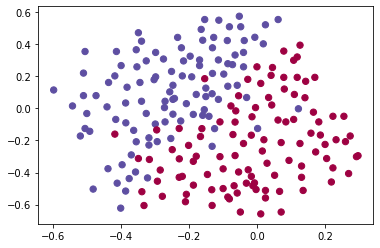

In [70]:
import scipy.io
import matplotlib.pyplot as plt

data = scipy.io.loadmat('data.mat')
train_X = data['X'].T
train_y = data['y'].T
test_X = data['Xval'].T
test_y = data['yval'].T

plt.scatter(train_X[0, :], train_X[1, :], c=train_y[0, :], s=40, cmap=plt.cm.Spectral);

In [71]:
print(train_X.shape) # should print something like (n_samples, 2)
print(train_y.shape) # should print something like (n_samples,)

(2, 211)
(1, 211)


Without Regularization

In [72]:
from keras import models
from keras import layers
import numpy as np
from keras import optimizers

model_noreg = models.Sequential()
model_noreg.add(layers.Dense(64, activation='relu', input_shape=(2,)))
model_noreg.add(layers.Dense(32, activation='relu'))
model_noreg.add(layers.Dense(16, activation='tanh'))
model_noreg.add(layers.Dense(1, activation='sigmoid'))

model_noreg.compile(loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

train_X = train_X.T
train_y = train_y.T
test_X = test_X.T
test_y = test_y.T

history = model_noreg.fit(np.array(train_X), np.array(train_y), epochs=2000, verbose=0)
test_loss, test_acc = model_noreg.evaluate(np.array(test_X), np.array(test_y), verbose=0)
print(f'Test accuracy : {test_acc}')



Test accuracy : 0.8999999761581421


In [73]:
#train_X = np.array(train_X.T)
#train_y = np.array(train_y.T)

#test_X = np.array(test_X.T)
#test_y = np.array(test_y.T)

print(test_X.shape)
print(test_y.shape)

(200, 2)
(200, 1)


With Regularization

In [74]:
from keras import models
from keras import layers
from keras import regularizers

model_reg = models.Sequential()
model_reg.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(2,)))
model_reg.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_reg.add(layers.Dense(16, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model_reg.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

model_reg.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

#train_X = train_X.T
#train_y = train_y.T
#test_X = test_X.T
#test_y = test_y.T

history = model_reg.fit(np.array(train_X), np.array(train_y), epochs=2000, verbose=0)

test_loss, test_acc = model_reg.evaluate(np.array(test_X), np.array(test_y), verbose=0)
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9300000071525574


Decision Boundaries : Here mlxtend was not working therefore, I used matplotlib

313/313 [==============================] - 1s 2ms/step


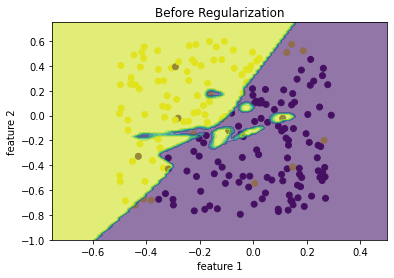

313/313 [==============================] - 1s 2ms/step


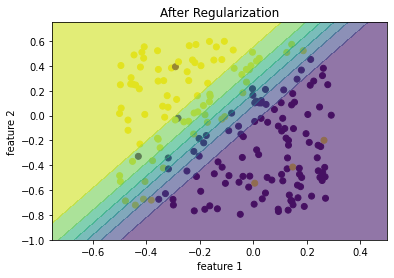

In [83]:
# Without Regularization
plt.scatter(test_X[:,0], test_X[:,1], c=test_y.ravel())
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Before Regularization')

x = np.linspace(-0.75, 0.5, 100)
y = np.linspace(-1, 0.75, 100)

noreg_x, noreg_y = np.meshgrid(x, y)
noreg_z = model_noreg.predict(np.c_[noreg_x.ravel(), noreg_y.ravel()]).reshape(noreg_x.shape)
plt.contourf(noreg_x, noreg_y, noreg_z, levels=6, alpha=0.6)

plt.show()

# With Regularization
plt.scatter(test_X[:,0], test_X[:,1], c=test_y.ravel())
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('After Regularization')

x = np.linspace(-0.75, 0.5, 100)
y = np.linspace(-1, 0.75, 100)

reg_x, reg_y = np.meshgrid(x, y)
reg_z = model_reg.predict(np.c_[reg_x.ravel(), reg_y.ravel()]).reshape(reg_x.shape)
plt.contourf(reg_x, reg_y, reg_z, levels=6, alpha=0.6)

plt.show()